In [14]:
from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time

In [15]:
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 2)

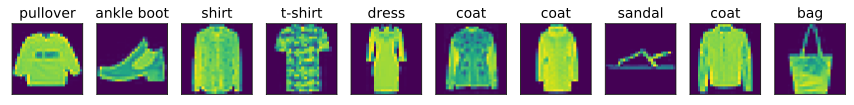

In [16]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
X, y = mnist_train[0:10]
# plot images
display.set_matplotlib_formats('svg')
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
mnist_train = mnist_train.transform_first(transformer)

In [18]:
batch_size = 256
train_data = gluon.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

BrokenPipeError: [Errno 32] Broken pipe

In [6]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

In [8]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(mnist_valid.transform_first(transformer),batch_size=batch_size, num_workers=4)

BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())

In [ ]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [26]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [27]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) ==
            label.astype('float32')).mean().asscalar()

In [28]:
for epoch in range(10):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)
    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)
    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            epoch, train_loss/len(train_data), train_acc/len(train_data),
            valid_acc/len(valid_data), time.time()-tic))

Epoch 0: loss 0.844, train acc 0.688, test acc 0.827, in 18.4 sec
Epoch 1: loss 0.465, train acc 0.827, test acc 0.846, in 18.2 sec
Epoch 2: loss 0.401, train acc 0.852, test acc 0.867, in 18.7 sec
Epoch 3: loss 0.364, train acc 0.865, test acc 0.875, in 20.2 sec
Epoch 4: loss 0.339, train acc 0.875, test acc 0.882, in 22.0 sec
Epoch 5: loss 0.320, train acc 0.882, test acc 0.883, in 22.1 sec
Epoch 6: loss 0.307, train acc 0.888, test acc 0.879, in 22.2 sec
Epoch 7: loss 0.295, train acc 0.891, test acc 0.887, in 22.3 sec
Epoch 8: loss 0.284, train acc 0.896, test acc 0.885, in 22.7 sec
Epoch 9: loss 0.274, train acc 0.899, test acc 0.896, in 22.8 sec


In [29]:
net.params

sequential0_ (

)

In [30]:
net.save_parameters('net.params')

In [31]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

In [32]:
mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

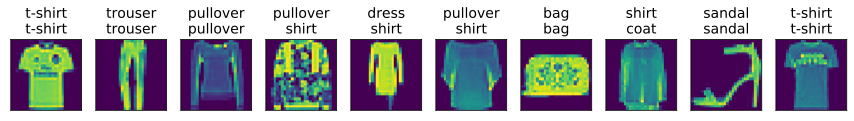

In [33]:

_, figs = plt.subplots(1, 10, figsize=(15, 15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
display.set_matplotlib_formats('svg')
for f,x,yi,pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()